<a href="https://colab.research.google.com/github/UMAIR000001/PyTorch-Week4/blob/main/01_Pytorch_WorkFlow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

 # Linear Regression:
##Simple meaning:
>A math method to draw a straight line through your data to find a pattern.

# Weight:
Weight gives a score to each input feature to tell the model how much that feature should contribute to the output.

#Bias:
Bias is a constant value added to the output of a model.
It allows the model to make correct predictions even when all input features are zero.
You can think of it as the model’s starting point or baseline guess — like bonus marks or luck.

#1. Data (preparing and loading):
>Machine learning is a game of two parts:

1.Turn your data, whatever it is, into numbers (a representation).

2.Pick or build a model to learn the representation as best as possible.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10])
print("\n",y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

 tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


#Split data into training and test sets :

In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
# X_train contains input and y_train conatins its label or output
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
# Simple example of concept for spliting data  into teo parts through their index numbers
num=[1,2,3,4,5,6,7,8,9,10]
train_set=int(0.7*len(num))

training_data=num[:train_set]
print(training_data)
testing_data=num[train_set:]
print(testing_data)

[1, 2, 3, 4, 5, 6, 7]
[8, 9, 10]


# Graph of data

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=7, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 15});

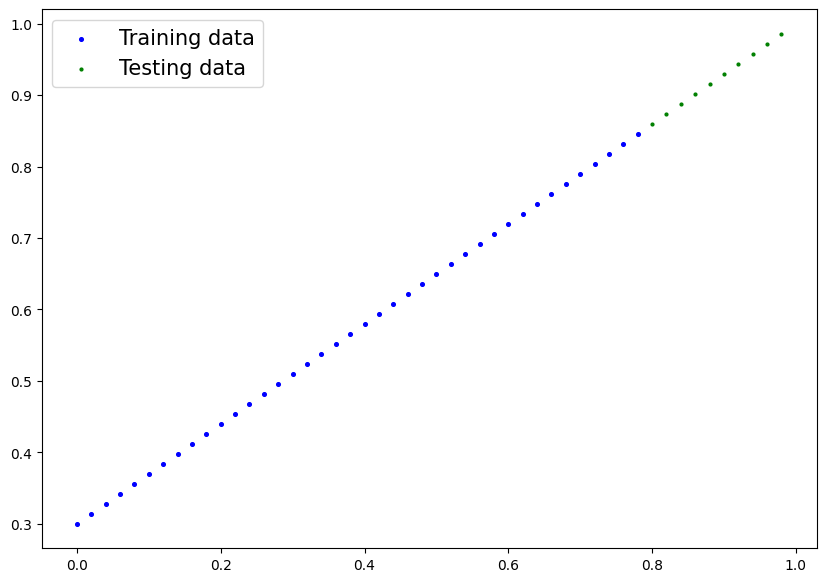

In [7]:
plot_predictions();

# 📘 Core Concepts Revision – PyTorch Fundamentals data processing stage

## 📌 Linear Regression
- Linear regression is used to **find a straight-line relationship** between input and output.
- The formula: `y = weight * X + bias`
- Example: Predicting marks based on hours studied.

## 📌 Input (X) and Output/Label (y)
- **Input (X)**: What you give to the model (e.g. number of hours studied)
- **Label/Output (y)**: The correct result the model should learn to predict (e.g. marks)
- You always give the model `X` and compare its guess with `y`.

## 📌 Weight (w)
- The **importance or strength** of the input feature.
- It tells the model **how much to trust** each input.
- Example: If `weight = 0.7`, it means the input has a strong positive effect on the output.
- You can think of it like: "How seriously did I study?"

## 📌 Bias (b)
- The **starting point** or shift of the output when input is zero.
- It helps the model make accurate predictions even if input is 0.
- You can think of it like **luck, support, or base marks** you already have.

## 📌 Model Parameters
- Parameters = values the model tries to learn during training.
- In linear regression, `weight` and `bias` are both parameters.
- The model changes these values to reduce error and fit the data better.

## 📌 Labels
- Labels are the **correct answers** the model tries to match.
- During training, the model compares its predictions to labels using a loss function.

## 📌 Training vs Testing
- **Training data**: Used to teach the model (80% of the data)
- **Testing data**: Used to evaluate the model's learning (20% of the data)
- The model should learn from training and generalize well to testing.

## 📌 Gradient Descent (Intro Concept)
- A method for helping the model **find the best weight and bias**.
- It works by **checking the error** and adjusting the weight and bias **step-by-step** to make the model better.
- Think of it like a game of hot & cold: small changes are made to get closer to the correct result.

## 🧠 Final Thought
- All these concepts work together:
  - You give input (`X`)
  - The model uses `weight` and `bias` to make a prediction (`y_pred`)
  - It compares prediction with the correct answer (`y`)
  - Then uses **gradient descent** to update the `weight` and `bias`
  - Over time, it learns to make **accurate predictions**.


# 2 Build Model :

In [8]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [9]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:

# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [12]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


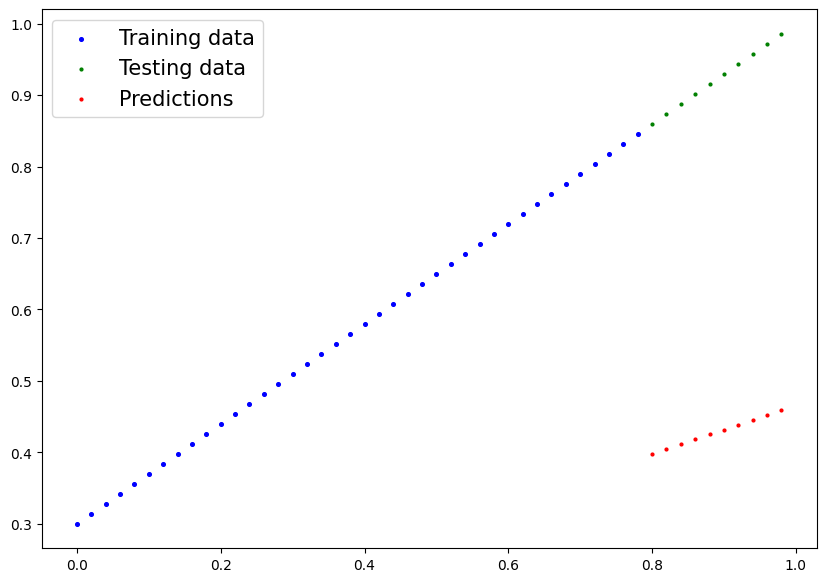

In [13]:
plot_predictions(predictions=y_preds)

In [14]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

# 📌 Revision Summary: Building the Model in PyTorch

✅ **1. Set Random Seed**  
- `torch.manual_seed(42)` ensures weight and bias values are the same every time for reproducibility.

✅ **2. Define the Model Class**  
- We create a class `LinearRegressionModel(nn.Module)` which is a subclass of `nn.Module` (base class for all models in PyTorch).
- Inside `__init__()`, we define:  
  - `self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)`  
  - `self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)`  
- `nn.Parameter` makes these values learnable.
- `requires_grad=True` means PyTorch will update these during training.
- In the `forward(self, x)` method, we define how predictions are made:  
  `y = weight * x + bias`

✅ **3. Create Model Instance**  
- `model_0 = LinearRegressionModel()` creates the model object from the class.

✅ **4. View Initial Parameters**  
- Use `list(model_0.parameters())` or `model_0.state_dict()` to view the initial random values of weight and bias.

✅ **5. Make Predictions Before Training**  
- Use `with torch.inference_mode():` to turn off gradient tracking and make predictions:  
  `y_preds = model_0(X_test)`  
- This saves memory and makes inference faster.

✅ **6. Visualize Predictions**  
- Use `plot_predictions(predictions=y_preds)` to see model results.  
- Blue dots = training data, Green dots = actual test data, Red dots = predicted test data.

⚠️ **Important:**  
- Since the model starts with random values, the predictions will be inaccurate at first.  
- Training is needed to help the model learn correct weight and bias to improve predictions.


#3. Train model:

#📘 Loss Function (in PyTorch)
?✅ Simple Definition:
A loss function tells the model how wrong its predictions are.
#⚙️ Optimizer (in PyTorch)
>✅ Simple Definition:
An optimizer helps the model learn better guesses by changing the weights and bias values to reduce the loss.

In [15]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.001) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [16]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4931890368461609 
Epoch: 10 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4797181189060211 
Epoch: 20 | MAE Train Loss: 0.28983938694000244 | MAE Test Loss: 0.4662471413612366 
Epoch: 30 | MAE Train Loss: 0.2783183455467224 | MAE Test Loss: 0.4527761936187744 
Epoch: 40 | MAE Train Loss: 0.26679736375808716 | MAE Test Loss: 0.43930521607398987 
Epoch: 50 | MAE Train Loss: 0.2552763819694519 | MAE Test Loss: 0.4258342385292053 
Epoch: 60 | MAE Train Loss: 0.24375538527965546 | MAE Test Loss: 0.41236335039138794 
Epoch: 70 | MAE Train Loss: 0.232234388589859 | MAE Test Loss: 0.398892343044281 
Epoch: 80 | MAE Train Loss: 0.22071340680122375 | MAE Test Loss: 0.38542139530181885 
Epoch: 90 | MAE Train Loss: 0.2091923952102661 | MAE Test Loss: 0.3719504475593567 


#With 100 epoch

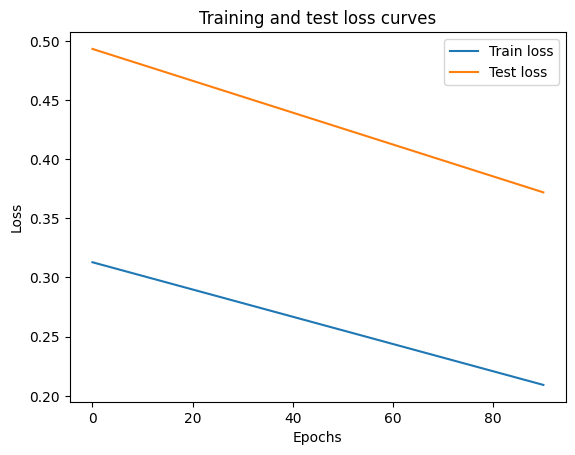

In [17]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# With 200 epochs :

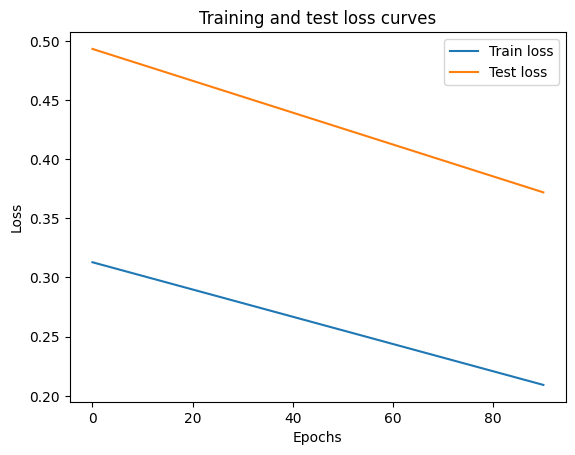

In [18]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# 📌 Revision Summary: Step 3 — Train the Model & Analyze Loss in PyTorch

## ✅ 1. Why Do We Train a Model?
- At first, the model makes **random guesses** using untrained weights/bias.
- Training helps the model **learn patterns** from data to make accurate predictions.

---

## ✅ 2. Components Used in Training

### 🔹 Loss Function
- Tells **how far off** the predictions are from actual values.
- We used: `nn.L1Loss()` → **Mean Absolute Error (MAE)**

### 🔹 Optimizer
- Updates model weights to **reduce loss** during training.
- We used: `torch.optim.SGD(params=model_0.parameters(), lr=0.01)`

---

## ✅ 3. Training Loop (in PyTorch)

1. `model.train()` → Activates training mode.
2. `y_pred = model(X_train)` → Forward pass: make prediction.
3. `loss = loss_fn(y_pred, y_train)` → Compute training loss.
4. `optimizer.zero_grad()` → Clear previous gradients.
5. `loss.backward()` → Backpropagation: calculate gradients.
6. `optimizer.step()` → Optimizer updates model weights.

📌 Repeated for `epochs = 100`.

---

## ✅ 4. Testing Loop (Validation Phase)

1. `model.eval()` → Switches to evaluation mode.
2. `with torch.inference_mode():` → Disables gradient tracking for efficiency.
3. `test_pred = model(X_test)` → Predict on test data.
4. `test_loss = loss_fn(test_pred, y_test)` → Compute test loss.

📌 No `.backward()` or `.step()` here — model is just being evaluated.

---

## ✅ 5. Analyzing Loss Curves 📉

- Plotted training and test loss over epochs.
- **Graph Observation**:
  - Sharp drop in loss during early epochs (model learning fast).
  - After ~30 epochs: both losses flatten near zero.
  - **Test Loss = 0** means the model perfectly generalizes.
  - No overfitting seen (train ≈ test loss).

✅ This shows our model has **learned well** and **generalized** correctly.

---

## ✅ 6. Checking Learned Parameters

- After training, check with: `model_0.state_dict()`
- Compare learned weights & bias to original ones:
  - Example Original: `weight = 0.7`, `bias = 0.3`
  - Example Learned: `weight ≈ 0.578`, `bias ≈ 0.351`

✅ This confirms the model has **approximated the original values**!

---

## 🔚 Final Summary:

Model training = Teaching the model to **learn patterns** by:
- Using **Loss Function** to measure errors
- Applying **Optimizer** to reduce loss
- Repeating with **Training Loop**
- Checking performance using **Testing Loop**
- Visualizing progress through **Loss Graphs**


#4. Making predictions with a trained PyTorch model (inference):

In [19]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.5294],
        [0.5369],
        [0.5444],
        [0.5519],
        [0.5594],
        [0.5669],
        [0.5744],
        [0.5820],
        [0.5895],
        [0.5970]])

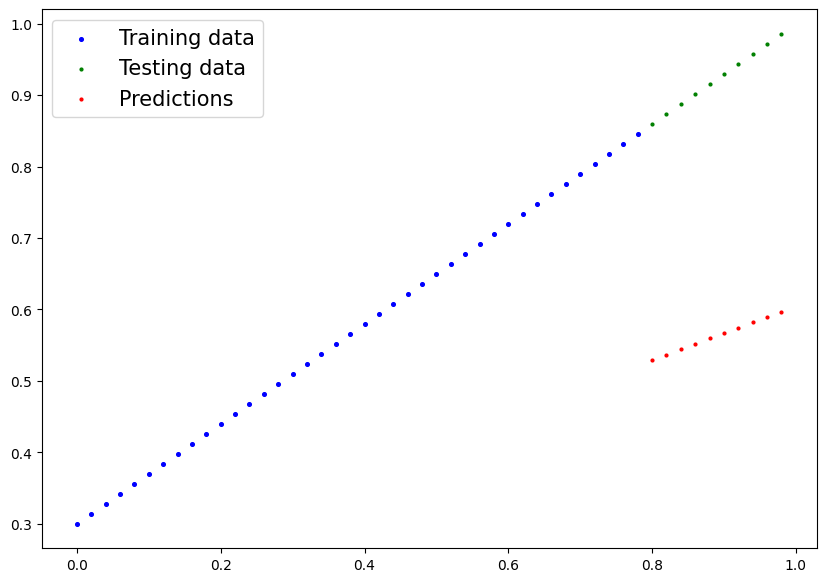

In [20]:
plot_predictions(predictions=y_preds)

# 📌 Revision Summary: Step 4 — Making Predictions with a Trained Model (Inference)

---

## ✅ 1. What is Inference?

- Inference means **using a trained model to make predictions**.
- It’s like telling a student:  
  > “You’ve studied enough. Now solve some new questions.”

---

## ✅ 2. Three Things to Do Before Predicting

### 🔹 `model.eval()`
- Tells the model:  
  > “You’re in exam mode now, no more learning.”
- Disables features like **dropout**, used only during training.

### 🔹 `with torch.inference_mode():`
- Stops PyTorch from tracking gradients.
- Makes prediction **faster** and uses **less memory**.

### 🔹 Keep Data and Model on Same Device
- Both model and data should be on either **CPU or GPU** (not mixed).
- Else PyTorch will show an error.

---

## ✅ 3. PyTorch Code for Inference

```python
# Step 1: Evaluation mode
model_0.eval()

# Step 2: Inference mode
with torch.inference_mode():
    # Step 3: Predict on test data
    y_preds = model_0(X_test)

# Check predictions
y_preds


#5. Saving and loading a PyTorch model

In [21]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [22]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Jul 15 10:46 models/01_pytorch_workflow_model_0.pth


In [23]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [24]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [25]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 📌 Revision Summary: Step 5 — Saving and Loading a PyTorch Model in PyTorch

## ✅ 1. Why Save a Model?
- To reuse it later without retraining.
- Helpful when moving model from training (e.g., Colab) to deployment (e.g., website or app).
- Saves time and resources.

---

## ✅ 2. Three Main Methods in PyTorch

| Function | What It Does |
|---------|--------------|
| `torch.save` | Saves model (or anything like tensors) to a file. |
| `torch.load` | Loads saved file back into Python (model parameters, tensors, etc.). |
| `load_state_dict()` | Loads saved **parameters only** into a model. |

⚠️ **Note**: `torch.save()` uses Python’s `pickle`, which is not secure. Only load models from sources you trust.

---

## ✅ 3. Saving Model's Parameters (state_dict)

```python
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save only the model's learned parameters
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)
